In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
def wiki_preprocess(text, Barplot=False, Wordcloud=False, Tokenize=False, Lemmatize=False):
    """
    Metinler üzerinde ön işleme  işlemlerini yapar.

    :param text: text Frame'deki metinlerin olduğu değişken
    :param Barplot: Barplot görselleştirme
    :param WordCloud: Word cloud görselleştirme
    :param Tokenize: Cümleleri kelimelere ayırma
    :param Lemmatize: Kelimeri köklerine ayırma
    :return: text

    Example:
        wiki_preprocess(textframe(["text"]))
    """
    # Normalizing Case Folding
    text=text.str.lower()
    
    # Punctuations
    text=text.apply(lambda x: re.sub("[^\w\s]","",str(x)))
    text=text.apply(lambda x: re.sub("\n"," ",str(x)))
    text=text.apply(lambda x: re.sub("â"," ",str(x)))
    
    # Numbers
    text=text.fillna('').apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
    
    # Stop Words
    sw=stopwords.words("english")
    text=text.apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
    
    # Rare Words / Custom Words
    clear_text=pd.Series(" ".join(text).split()).value_counts()[-1000:]
    text=text.apply(lambda x: " ".join(x for x in str(x).split() if x not in clear_text))
      
    if Barplot:
        tf=pd.Series(" ".join(text).split()).value_counts()
        tf=pd.DataFrame(tf)
        tf.reset_index(inplace=True)
        tf.columns=["words","counts"]
        tf[tf["counts"]>10000].plot.bar(x="words",y="counts")
        plt.show()

    if Wordcloud:
        wordcloud_text=" ".join(i for i in text)
        wordcloud=WordCloud(max_font_size=10000,
                            max_words=1000,
                            background_color="black").generate(wordcloud_text)
        plt.figure()
        plt.imshow(wordcloud,interpolation="bilinear")
        plt.axis("off")
        plt.show()

    if Tokenize:
        text=text.apply(lambda x: TextBlob(x).words) 
    
    if Lemmatize:
        text=text.apply(lambda x: " ".join(Word(x).lemmatize() for x in str(x).split()))

    return text

In [3]:
df=pd.read_csv("C:\\Users\\Dell\\Desktop\\NLP\\Case Study 2\\wiki_data.csv",index_col=0)
df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10859 entries, 1 to 10859
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10859 non-null  object
dtypes: object(1)
memory usage: 169.7+ KB


In [5]:
df.iloc[2:3].values

array([['Bob Pease\n\nRobert Allen Pease (August 22, 1940Â\xa0â€“ June 18, 2011) was an analog integrated circuit design expert and technical author. He designed several very successful "best-seller" integrated circuits, many of them in continuous production for multiple decades. These include the LM331 voltage-to-frequency converter, and the LM337 adjustable negative voltage regulator (complement to the LM317).\n\nPease was born on August 22, 1940 in Rockville, Connecticut. He attended Northfield Mount Hermon School in Massachusetts, and subsequently obtained a Bachelor of Science in Electrical Engineering (BSEE) degree from Massachusetts Institute of Technology in 1961.\n\nHe started work in the early 1960s at George A. Philbrick Researches (GAP-R). GAP-R pioneered the first reasonable-cost, mass-produced operational amplifier (op-amp), the K2-W. At GAP-R, Pease developed many high-performance op-amps, built with discrete solid-state components.\n\nIn 1976, Pease moved to National Se

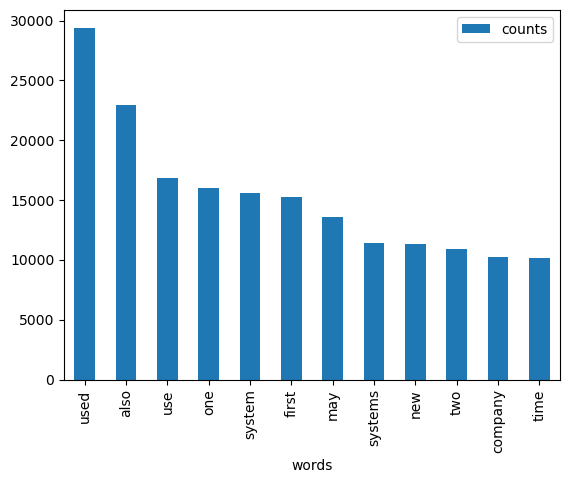

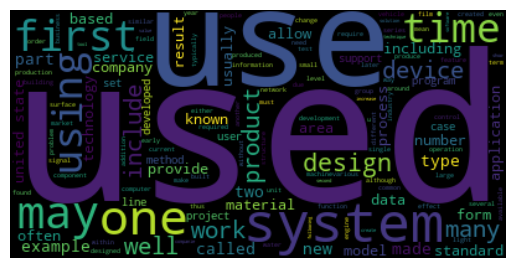

1        anovo anovo formerly novo computer services co...
2        battery indicator battery indicator also known...
3        bob pease robert allen pease august june analo...
4        cavnet cavnet secure military forum became ope...
5        clidar clidar scientific instrument used measu...
                               ...                        
10855    soundcast soundcast llc privately funded compa...
10856    spectrum analyzer spectrum analyzer measures m...
10857    telepresence technology telepresence technolog...
10858    transpacific profiler network transpacific pro...
10859    transfer case transfer case part drivetrain fo...
Name: text, Length: 10859, dtype: object

In [6]:
wiki_preprocess(df["text"],True,True)

In [7]:
data=wiki_preprocess(df["text"],Lemmatize=True)
data.iloc[2:3].values

array(['bob pea robert allen pea august june analog integrated circuit design expert technical author designed several successful bestseller integrated circuit many continuous production multiple decade include lm voltagetofrequency converter lm adjustable negative voltage regulator complement lm pea born august rockville connecticut attended northfield mount hermon school massachusetts subsequently obtained bachelor science electrical engineering bsee degree massachusetts institute technology started work early george philbrick research gapr gapr pioneered first reasonablecost massproduced operational amplifier opamp kw gapr pea developed many highperformance opamps built discrete solidstate component pea moved national semiconductor corporation nsc designer application engineer began designing analog monolithic integrated circuit well design reference circuit using device advanced staff scientist time departure tenure nsc began writing popular continuing monthly column called pea por